# Project 3

## Stirred


## Group 1 9:

- Mussa Banjai
- Tapas Dev
- Jason Kapka
- Taz Ahmed

## Introduction



## Abstract



## Libraries

In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import math as m
import scipy as sp
from scipy import optimize
import pandas as pd

## ODE Solver class

In [2]:
class ODE_Solver:
    def __init__(
                self,
                f,
                t,
                dt,
                y,
                tau = 2,
                t0 = 0,
                tf = 1,
                ):
        
        self.f = f
        self.t = t
        self.dt = dt
        self.y = y
        self.tau = tau
        self.t0 = t0
        self.tf = tf
        # self.c0 = c0

    def f(self):
        n=len(c)
        cinj=0
        rhs=[]
        for i in range(n):
            if i==0:
                rhs.append(cinj-c[0])
            else:
                rhs.append(c[i-1] - c[i])
        return np.array(rhs) * n/tau


    def rk2(self, f,y,t,dt,*args,**kwargs):
        k1=dt*f(y,t,*args,**kwargs)
        k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
        return k2

    def rk4(self, f,y,t,dt,*args,**kwargs):
        k1=dt*f(y,t,*args,**kwargs)
        k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
        k3=dt*f(y+k2/2,t+dt/2,*args,**kwargs)
        k4=dt*f(y+k3,t+dt,*args,**kwargs)
        return (k1+2*k2+2*k3+k4)/6

# Exercises

## Exercise 1: Write your own ODE solver

### Part 1

In [3]:
def f(c,t,tau=2):
    n=len(c)
    cinj=0
    rhs=[]
    for i in range(n):
        if i==0:
            rhs.append(cinj-c[0])
        else:
            rhs.append(c[i-1] - c[i])
    # convert into numpy array
    return np.array(rhs) * n/tau
    # return -1/tau*c

def analytical(t,*,c0=[1,0,0],tau=2, n=1):
    if n==1:
        return np.exp(-(t/tau))
    if n==2:
        return ((2*t)/tau) * np.exp(-(2*t/tau))
    if n == 3:
        return ((9*(t**2))/(2*tau**2)) * np.exp(-(3*t/tau))

def f2(y,t,omega):
    Y0,Y1=y
    return np.array([Y1,-omega*omega*Y0])

In [4]:
def rk2(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    return k2

def rk4(f,y,t,dt,*args,**kwargs):
    k1=dt*f(y,t,*args,**kwargs)
    k2=dt*f(y+k1/2,t+dt/2,*args,**kwargs)
    k3=dt*f(y+k2/2,t+dt/2,*args,**kwargs)
    k4=dt*f(y+k3,t+dt,*args,**kwargs)
    return (k1+2*k2+2*k3+k4)/6


def ode_solver(f,c0,t0,tf,dt,method,*args,**kwargs):
    c=[]
    t=[]
    c.append(c0)
    t.append(t0)
    ti=t0
    while(ti<=tf):
        ti=ti+dt
        if method == 'euler':
            step=dt*f(c[-1],ti,*args,**kwargs)
        elif method == 'rk2':
            step=rk2(f,c[-1],ti,dt,*args,**kwargs)
        elif method == 'rk4':
            step= rk4(f,c[-1],ti,dt,*args,**kwargs)
        c.append(c[-1]+step)
        t.append(ti)
    return np.array(t),np.array(c)

### Part 2

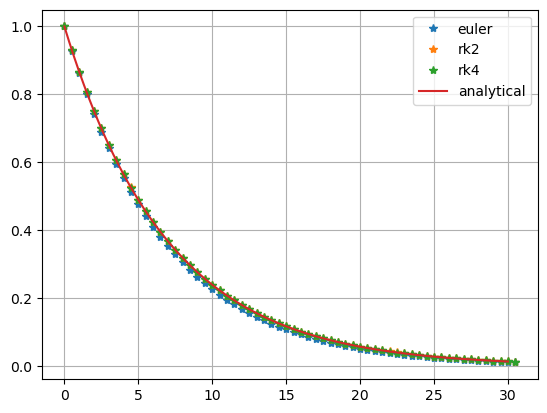

In [5]:
methods=['euler','rk2','rk4']
tf=30
t=np.linspace(0,tf,1000)
tau=7
for method in methods:
    tn,cn=ode_solver(f,c0=[1],t0=0,tf=30,dt=.5,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=1),label='analytical')
plt.grid()
plt.legend()

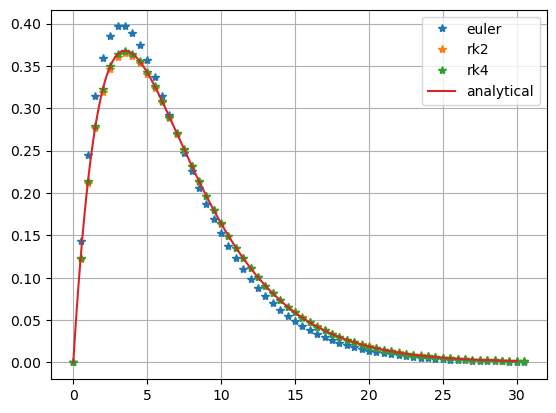

In [6]:
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0],t0=0,tf=30,dt=.5,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=2),label='analytical')
plt.grid()
plt.legend()

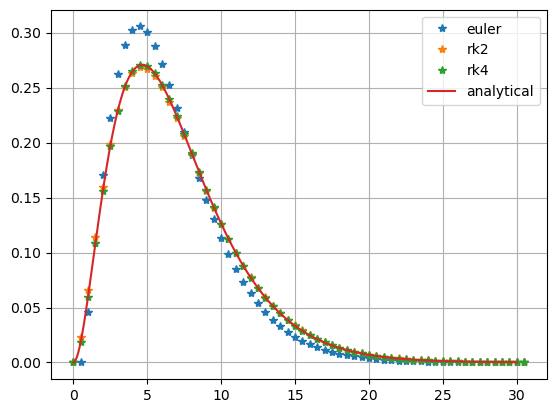

In [7]:
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0,0],t0=0,tf=30,dt=.5,method=method,tau=tau)
    plt.plot(tn,cn[:, -1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=3),label='analytical')
plt.grid()
plt.legend()

### Part 3

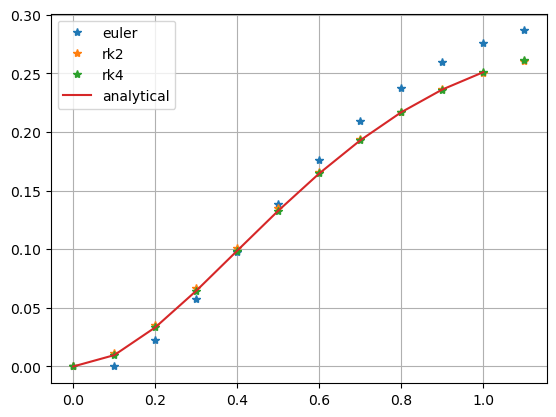

In [9]:
methods=['euler','rk2','rk4']
tf=1
dt = 0.1
t= np.arange(0, tf+dt, dt)#np.linspace(0,tf,1000)
tau=2
for method in methods:
    tn,cn=ode_solver(f,c0=[1,0,0],t0=0,tf=1,dt=dt,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=3),label='analytical')
plt.grid()
plt.legend()

# Cant be the exact 

## Exercise 2: Fit CSTR model to CFD model: Healthy aorta

### Part 1

Data

In [8]:
healthy_rect_1s = pd.read_csv("data/Healthy_rect_1s.csv", delimiter=",")
concentration = healthy_rect_1s["Concentration"]
time = healthy_rect_1s["Time"]
healthy_rect_1s

,Time,Concentration
0,0.00,0.000000e+00
1,0.02,0.000000e+00
2,0.04,0.000000e+00
3,0.06,0.000000e+00
4,0.08,0.000000e+00
...,...,...
246,4.92,8.620000e-06
247,4.94,4.980000e-06
248,4.96,2.020000e-06
249,4.98,2.510000e-08


Calculation

In [9]:
Minj = 83.33 # grams
Q =  np.trapz(concentration, x=time)
q = Minj/Q

"""
The solution is in g/sec. Needs to convert to L/min
1 g/s = 0.060 L/min
"""
q = q*0.06
q


5.005803448030458

### Part 2

In [57]:
"""
ti
ci: c injection
qi: q injection
"""

def c_inj(t,ti=[0,1.,1.,2.,2.],ci=[1,1,0,0,0]):#qi=np.array([0,0,0,0,0]),
    return np.interp(t,ti,ci)#,np.interp(t,ti,qi)

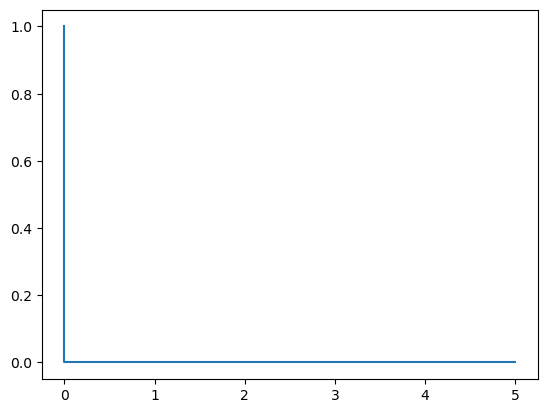

In [58]:
x = np.arange(6)

plt.step(x, c_inj(x))
plt.show()

In [11]:
def c_inj_alternative(t):
    if t < 1:
        return 1.
    else:
        return 0.


In [18]:
c_inj(1, ci=np.array([1,1,1,0,0]))

(1.0, 0.0)

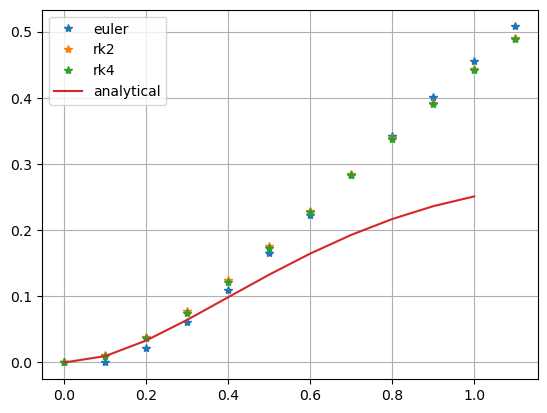

In [22]:
methods=['euler','rk2','rk4']
tf=1
dt = 0.1
t= np.arange(0, tf+dt, dt)#np.linspace(0,tf,1000)
tau=2
for method in methods:
    tn,cn=ode_solver(f_,c0=[1,0,0],t0=0,tf=1,dt=dt,method=method,tau=tau)
    plt.plot(tn,cn[:,-1],'*',label=method)
plt.plot(t,analytical(t,tau=tau, n=3),label='analytical')
plt.grid()
plt.legend()

In [21]:
def f_(c,t,tau=2):
    n=len(c)
    cinj=c_inj(t)
    print()
    rhs=[]
    for i in range(n):
        if i==0:
            rhs.append(cinj[0]-c[0])
        else:
            rhs.append(c[i-1] - c[i])
    # convert into numpy array
    return np.array(rhs) * n/tau
    # return -1/tau*c

### Part 3

### Part 4

## Exercise 3: Fit CSTR model to CFD model: Aorta with aneurysm

### Part 1

### Part 2

### Part 3

### Part 4

## Exercise 4: Extend model

### Part 1

### Part 2

### Part 3

### Part 4

## Reflections

### How did we work?
Basically, we worked on project in the group room, alongside with the lab classes which helped us a lot to discuss about the problems as well as finding the solution. We worked together even if any of us find any solution then we discussed about this and then came to a proper solution which looked like a good way of learning for us. Before finalizing any problem's solution, we together ended up with a good solution and agreed upon that.

Jason created some initial coding and worked on finding the solutions to the problem in theoretical matter. Taz and Tapas worked also on the theorectical matter proofs final Python code. Mussa wrote large sections of Python code and acted as Project Manager by compiling the individual contributions into a final product.


### What we did in the project?
We evaluated the analtical, numerical and line-source solution with two different boundary conditions and also found out the error between them by visuallizing the graphs. Then we matched our well test data from the provided file.

### Our Learnings?
We learnt the implementation of different numerical solvers for the radial deffusivity equation. We also learnt about PressureSolver Class. Besides, we also came across the learning of using two different boundary conditions. Although we did struggle in some stages but this project will help us in near future.future.


## Conclusion



## References

1) Aksel Hiorth. Computational Engineering and Modeling, 2021
   https://github.com/ahiorth/CompEngineering